# Визуализация данных

На семинаре мы будем заниматься построением различных визуализаций. Наша цель - провести **разведочный анализ данных**, чтобы исследовать поведение данных и выявить в них закономерности.

Мы продолжим работать с данными о пассажирах Титаника.

Цели:
* познакомиться с библиотекой matplotlib, seaborn и визуализациями в pandas
* научиться делать различные визуализации
* заполнять пропуски в данных
* делать однофакторный анализ
* конструировать новые признаки

Как нужно строить графики:
1. Если график стандартный используйте matplotlib напрямую из pandas 
2. Если график не стандартный используйте matplotlib
3. Если график совсем не стандартный то разделите его на несколько стандартных и используйте matplotlib
4. В каких случаях нужно использовать seaborn (если нужны профильные красивые графики, график гистограммы с распределением, японские свечи, график pairplot или heatmap, это всё тоже можно сделать в matplotlib  но это будет дольше)
5. В каких случаях стоит использовать plotly если у вас есть два часа времени чтобы построить 1 график нормального качества
6. Для чего нужен plotly, чтобы был один красивый график за который вам очень хорошо заплатят

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("seaborn")


%pylab inline

Populating the interactive namespace from numpy and matplotlib


Загрузим данные.

In [44]:
df = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/data_sem1.csv",
                   sep=";")

Давайте посмотрим на данные глазами

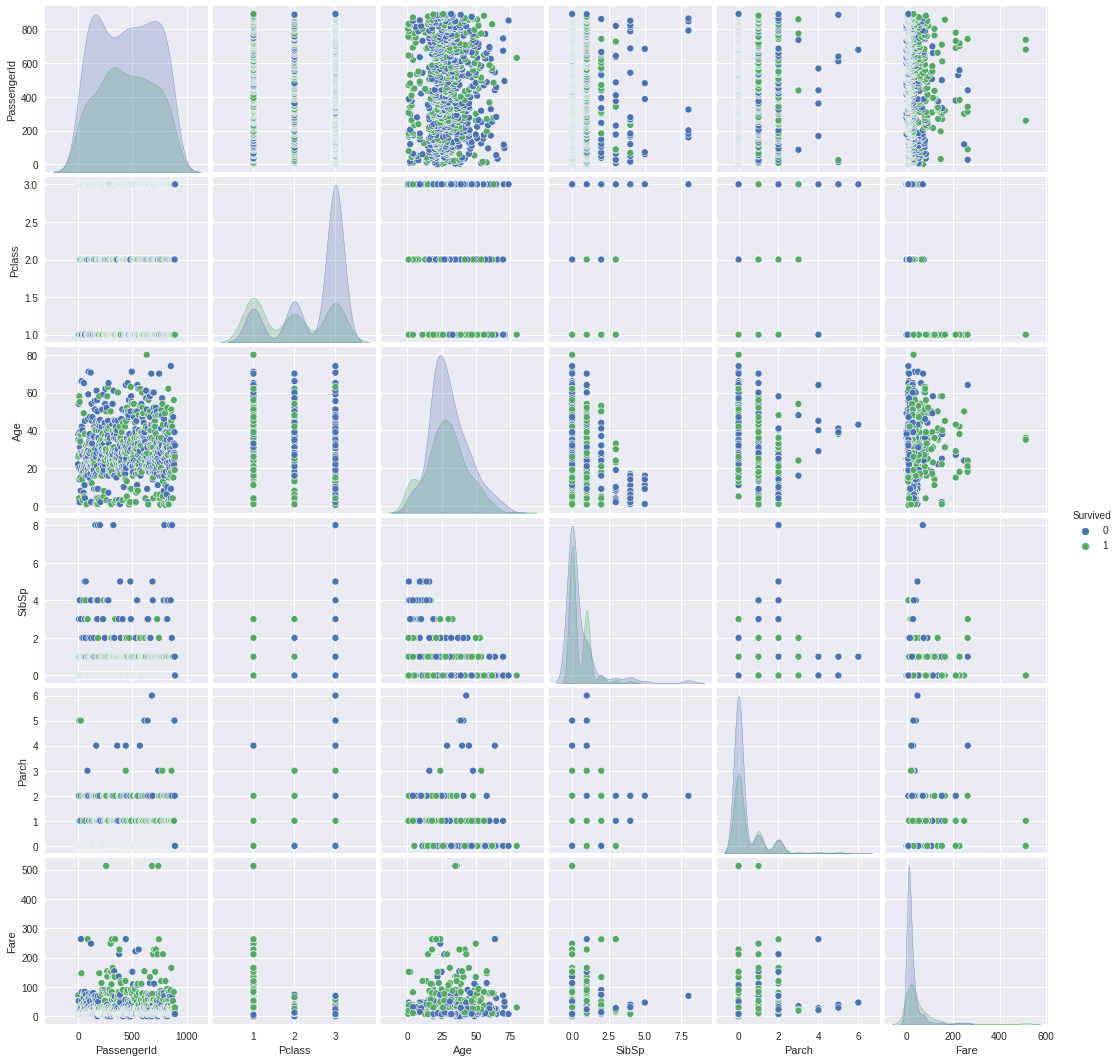

In [4]:
sns.pairplot(df, hue='Survived'); # hue - разделить по цвету

посмотрим на датасет

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Оценим долю nan

In [6]:
df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Начинаем работу с pandas plot

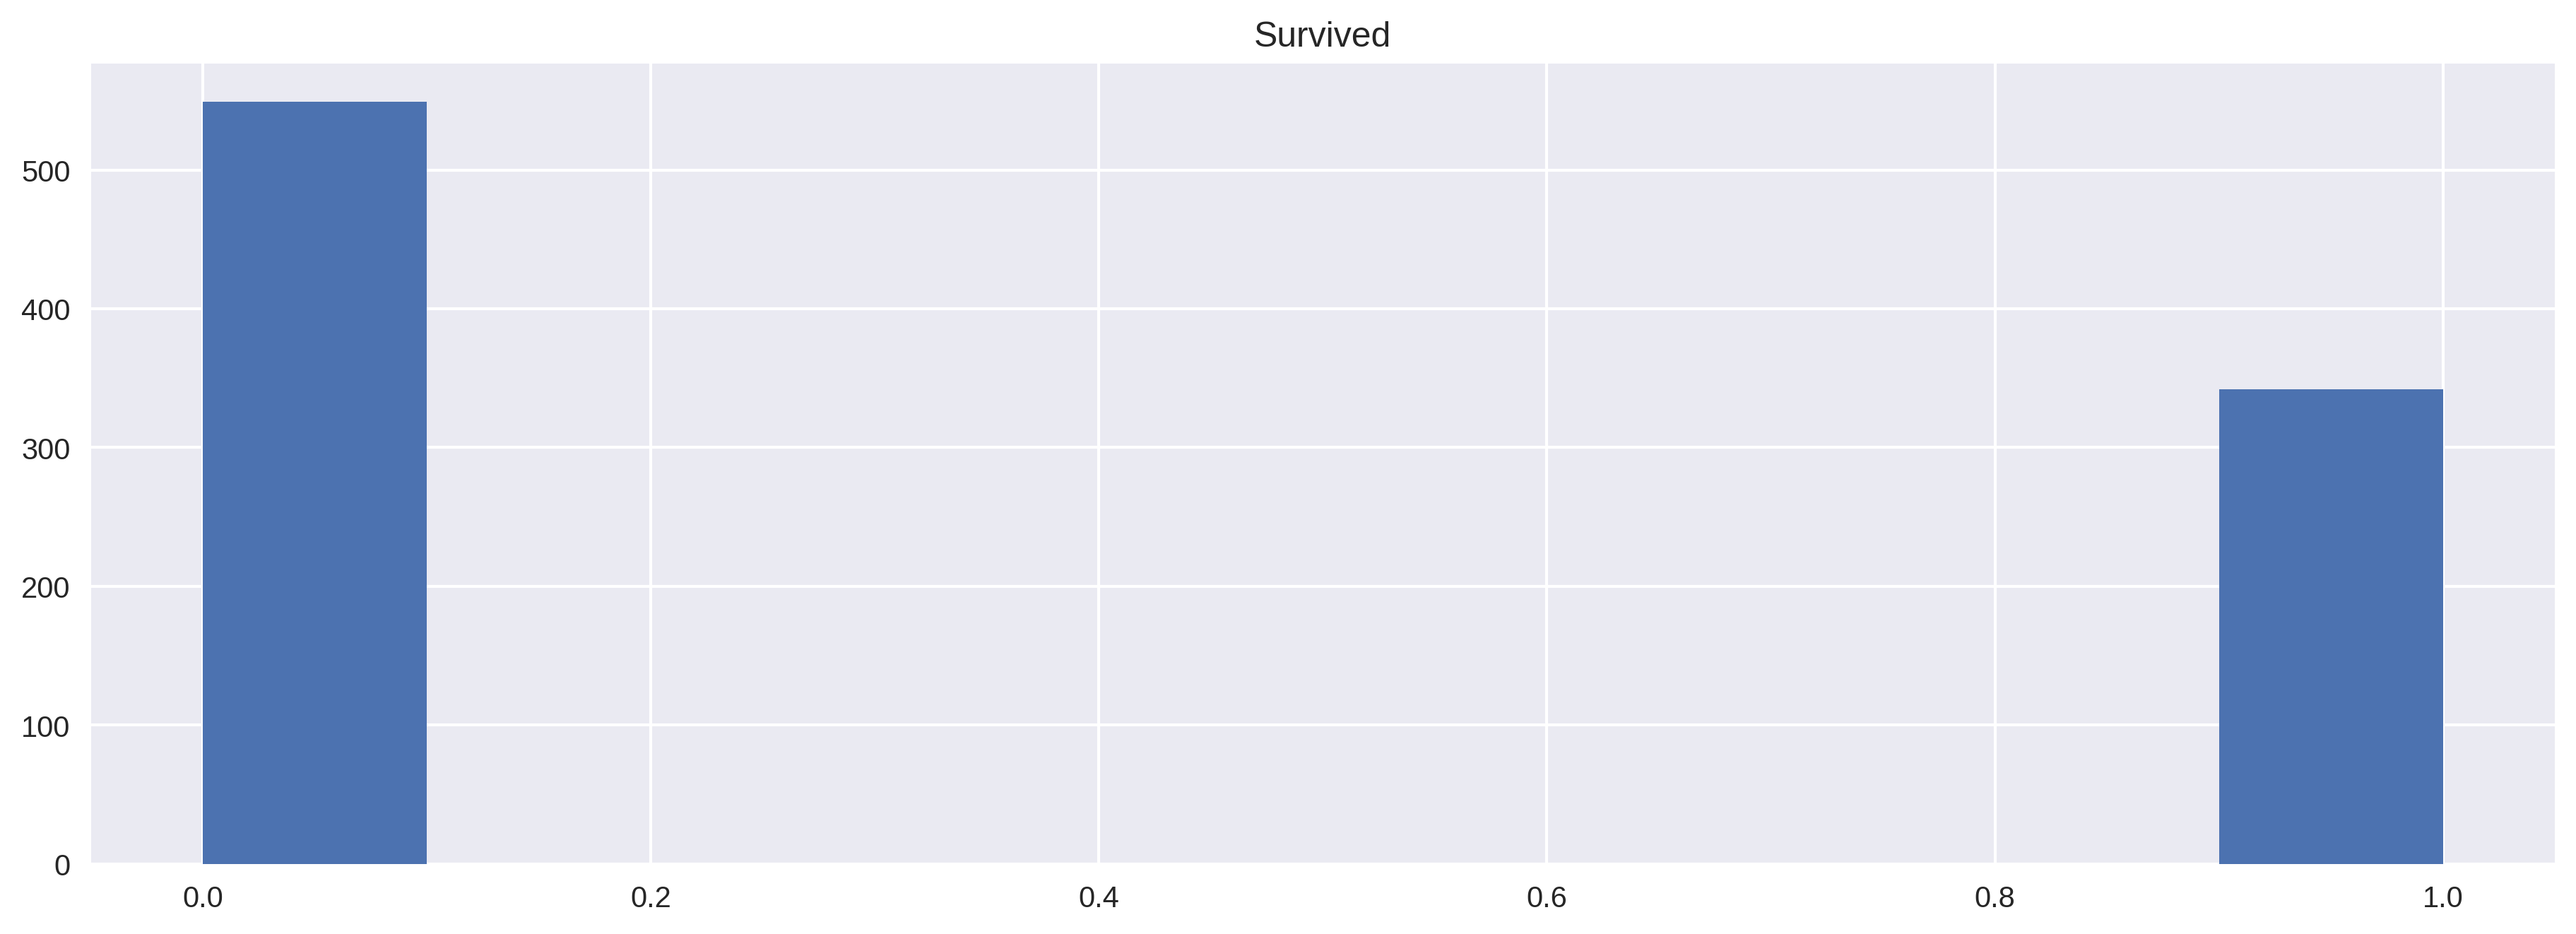

In [7]:
plt.figure(figsize=(15, 5), dpi=300) # figsize - размер
plt.title('Survived')
df['Survived'].hist(); # hist - гистограмма

давайте построим гистаграмму по возрасту 

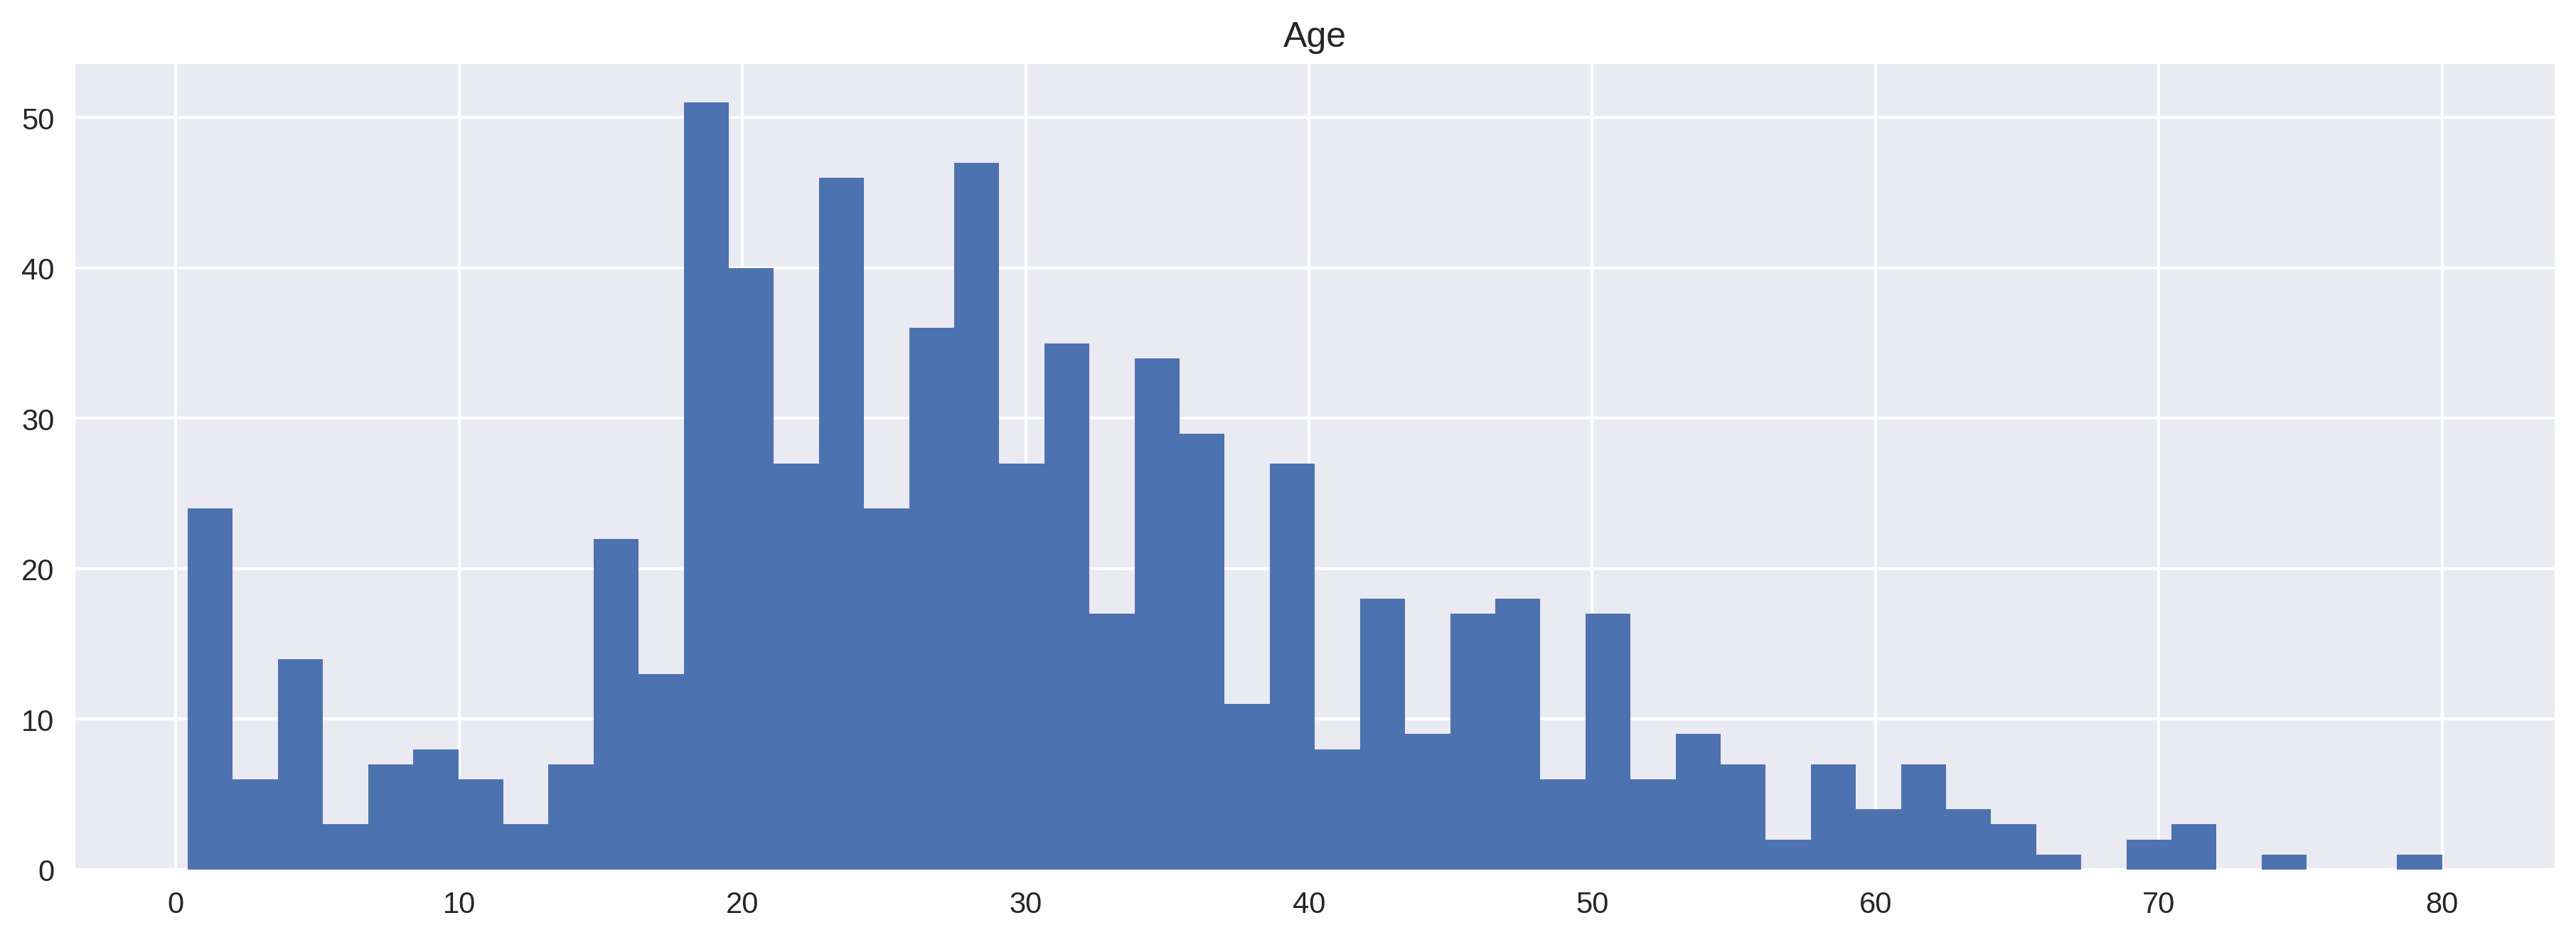

In [8]:
fig = plt.figure(figsize=(15, 5), dpi=300)
plt.title('Age')
df['Age'].hist(bins=50); # bins - число столбцов (отрезков, на которые делятся данные)

а теперь ходим добавить разделение по группам выживших и не выживших

посмотрим как сделать такой график в seaborn 

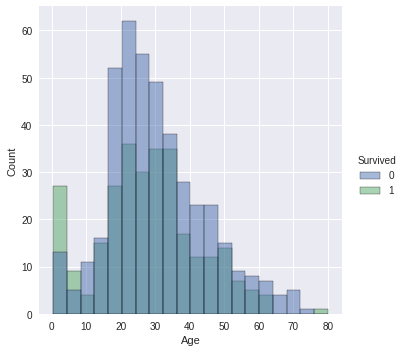

In [9]:
#plt.figure(figsize=(15, 5), dpi=300)
sns.displot(df, x='Age', hue='Survived');

а теперь посмотрим как сделать такой график в matplotlib 

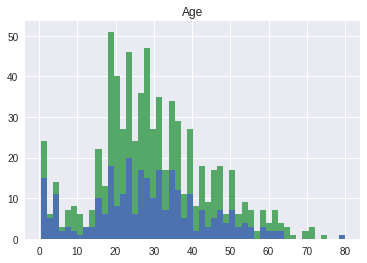

In [10]:
plt.title('Age')
plt.hist([df['Age'][df['Survived']==1], df['Age'][df['Survived']==0]], stacked=True,  bins=50);

Давайте оценим корреляция между столбцами признаков 

In [11]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


а теперь сделаем её чуть лучше читаемой

<AxesSubplot:>

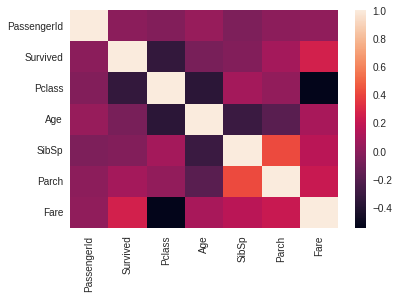

In [12]:
sns.heatmap(df.corr())

и ещё чуть лучше

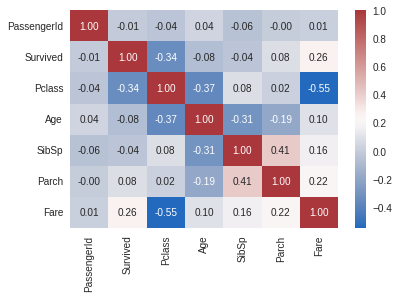

In [13]:
sns.heatmap(df.corr(), cmap='vlag', annot=True, fmt='0.2f'); # cmap - другие цвета; annot - стоял ли чиселки; fmt - теперь два знака после запятой

неповторимый идеал

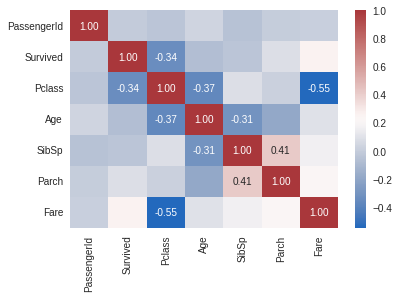

In [14]:
ax = sns.heatmap(df.corr(), cmap='vlag', annot=True, fmt='0.2f')
for t in ax.texts:
    if float(t.get_text())>=0.3 or float(t.get_text())<=-0.3:
        t.set_text(t.get_text()) 
    else:
        t.set_text("")

bar plot

<AxesSubplot:ylabel='Pclass'>

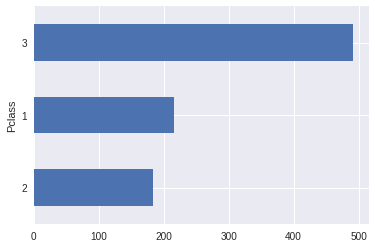

In [15]:
df.groupby('Pclass')['Name'].nunique().sort_values().plot(kind='barh')

scatter plot

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


как scatter  строить не нужно

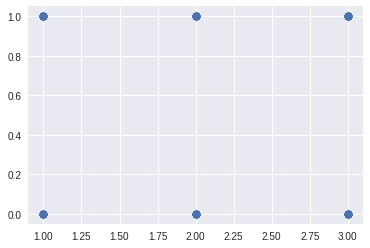

In [17]:
plt.scatter(df['Pclass'], df['Survived']); # рисование с точками (лучше когда числовые переменные)

как scatter строить нужно

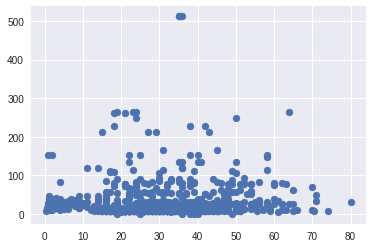

In [18]:
plt.scatter(df['Age'], df['Fare']);

суперпозиция графиков 

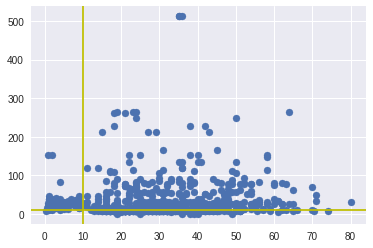

In [19]:
plt.scatter(df['Age'], df['Fare']);
plt.axhline(10, c='y'); # горизонтальная прямая
plt.axvline(10, c='y'); # вертикальная прямая

subplots

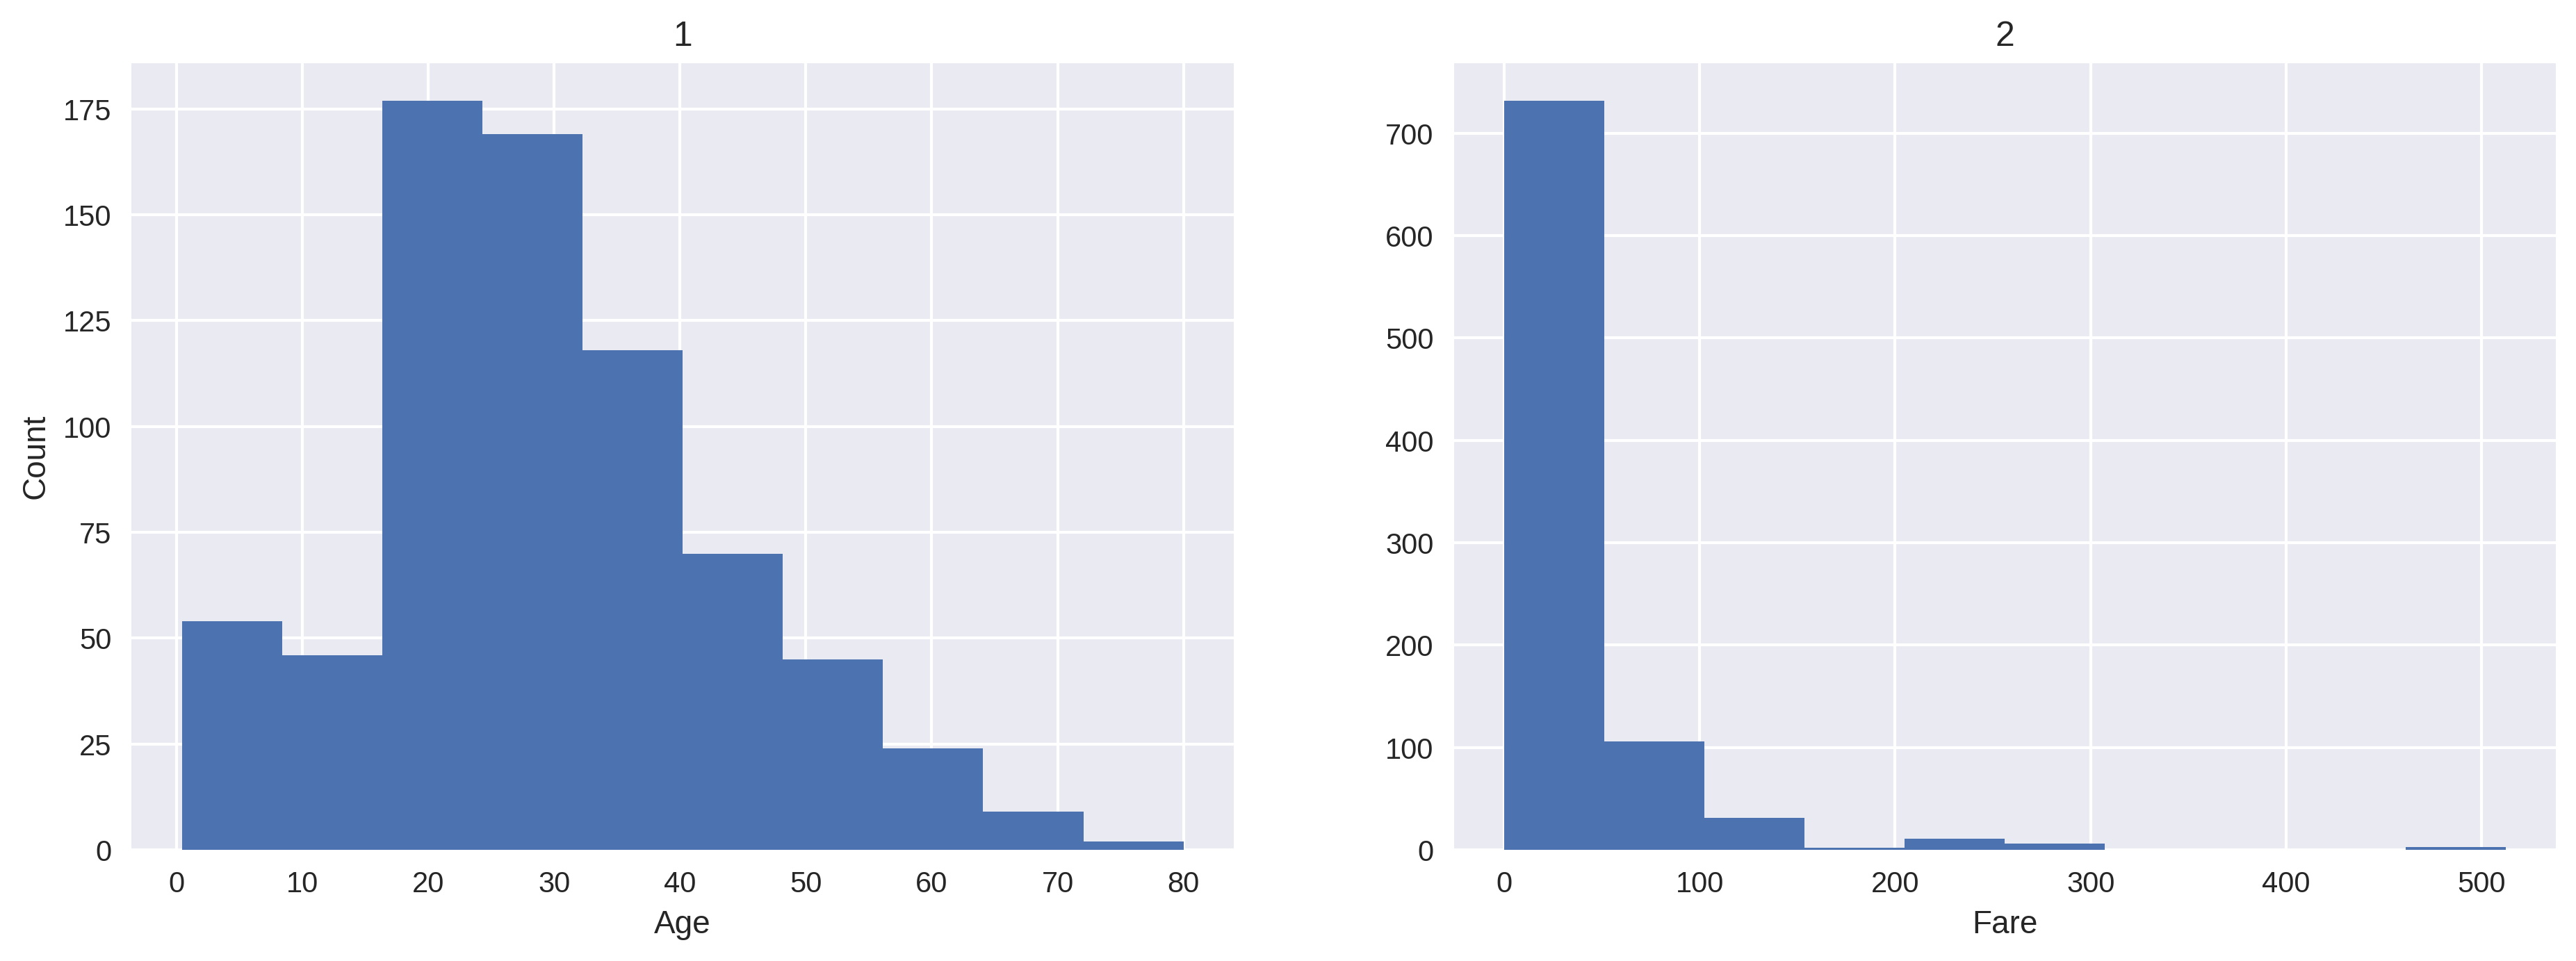

In [20]:
plt.figure(figsize=(15, 5), dpi=300)
plt.subplot(1, 2, 1) # строка, столбец, какой график (начинаем с 1-го)
plt.title('1')
plt.hist(df['Age'])
plt.ylabel('Count')
plt.xlabel('Age')
plt.subplot(1, 2, 2)
plt.title('2')
plt.hist(df['Fare'])
plt.xlabel('Fare')
plt.show()

# Обработка признаков и однофакторный анализ

1) Найдем признаки, у которых есть пропущенные значения и обработаем эти пропущенные значения

2) Переведём категориальные признаки в числовые

**Задание 2.** Выведите основные числовые характеристики числовых столбцов.

In [21]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Функция не позволяет увидеть наличие пропусков в нечисловых столбцах.

**Обработаем признак 'Sex'**

**Задание 3.** Проверьте, есть ли пропуски в столбце.

In [22]:
df.isnull().mean() # нету пропусков

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [23]:
df['Sex'].unique()

array(['male', 'female', 'unknown'], dtype=object)

In [24]:
df['Sex_number'] = df['Sex'].apply(lambda x: list(df['Sex'].unique()).index(x)) # номер пола в списке полов
df['Male'] = (df['Sex'] == 'male').astype('int') # приводит к int
df['Female'] = (df['Sex'] == 'female').astype('int')
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_number,Male,Female
40,41,0,3,Ahlin; Mrs. Johan (Johanna Persdotter Larsson),female,40.0,1,0,7546,9.4750,NaN,S,1,0,1
496,497,1,1,Eustis; Miss. Elizabeth Mussey,female,54.0,1,0,36947,78.2667,D20,C,1,0,1
445,446,1,1,Dodge; Master. Washington,male,4.0,0,2,33638,81.8583,A34,S,0,1,0


**Задание 4.** Удалите пассажиров неизвестного пола, так как их всего 5.

In [25]:
df.shape

(891, 15)

In [26]:
df = df[df.Sex != 'unknown'] # <=> df[df['Sex'] != 'unknown']
df.shape

(886, 15)

**Задание ***. Подумайте, можно ли как-то узнать пол пассажиров, которые отнесены к категории unknown?

In [27]:
# по Mr или Ms или в процентном соотношении
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_number,Male,Female
98,99,1,2,Doling; Mrs. John T (Ada Julia Bone),female,34.0,0,1,231919,23.0000,NaN,S,1,0,1
31,32,1,1,Spencer; Mrs. William Augustus (Marie Eugenie),female,NaN,1,0,PC 17569,146.5208,B78,C,1,0,1
530,531,1,2,Quick; Miss. Phyllis May,female,2.0,1,1,26360,26.0000,NaN,S,1,0,1


Признак 'Sex' является категориальным, то есть содержит нечисловые значения. Для работы большинства алгоритмов необходимо переводить категории в числа. Как это можно сделать? 

**Задание 5.** Придумайте кодировку и сделайте её.

In [28]:
df['Male'] = (df['Sex'] == 'male').astype('int') # приводит к int
df['Female'] = (df['Sex'] == 'female').astype('int')

<ipython-input-28-22c92e761142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Male'] = (df['Sex'] == 'male').astype('int') # приводит к int
<ipython-input-28-22c92e761142>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Female'] = (df['Sex'] == 'female').astype('int')


Посмотрим, как влияет пол на выживаемость.

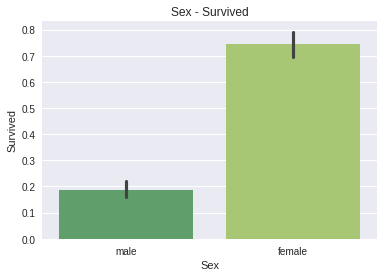

In [29]:
sns.barplot(x='Sex', y='Survived', data=df, palette='summer')
plt.title('Sex - Survived')
plt.show()

Посмотрим, как влияет пол человека и класс билета (Pclass) на выживаемость

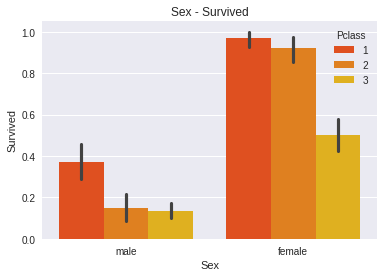

In [30]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, palette='autumn') # hue - разделение по цвету относительно класса
plt.title('Sex - Survived')
plt.show()

Ещё один полезный вид визуализации - ящик с усами. Посмотрим на ящик с усами, отражающий распределение пассажиров по полу и возрасту.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


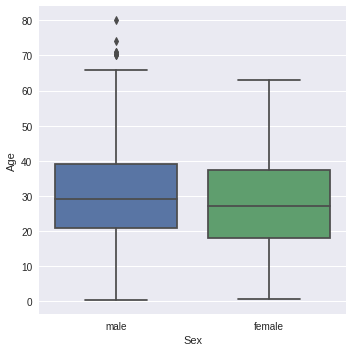

In [31]:
sns.factorplot(x="Sex", y="Age", data=df, kind="box") # box plot (box-and-whiskers-plot)
plt.show() # по середине идет медиана. Ножки - концы. Точки за ножками - выбросы (не попали в основное распределение)

Можно детализировать картинку, добавив разделение по Pclass.

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


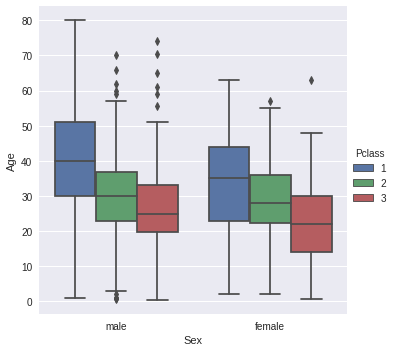

In [32]:
sns.factorplot(x="Sex", y="Age", hue ="Pclass", data=df, kind="box")
plt.show()


**Обработаем признак 'Embarked'**

In [33]:
print(df['Embarked'].value_counts(dropna=False))
df.shape

S      641
C      168
Q       75
NaN      2
Name: Embarked, dtype: int64


(886, 15)

**Задание 6.** Удалим из таблицы пассажиров, для которых неизвестен порт посадки (Embarked).

In [34]:
df.dropna(subset=['Embarked'], inplace=True) # убираем строки, где в столбце Embarked NaN
df.shape

(884, 15)

**Задание 7.** Закодируем столбец Embarked с помощью OneHot-кодирования (pd.get_dummies). 

In [45]:
print(df.Embarked.unique())
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True) # drop_first - не кодируем первый (тот, который C)
df.head()

['S' 'C' 'Q' nan]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,1


**Обработаем признак 'Age'**

Проверьте, если ли в Age пропущенные значения.

In [ ]:
# было

Заполним пропуски медианным значением Age.

In [ ]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

Нарисуем распределение возраста пассажиров.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


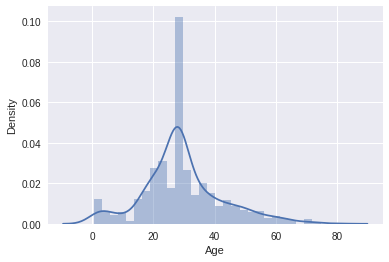

In [ ]:
sns.distplot(df['Age'], kde=True)
plt.show()

In [ ]:
median_age # логично по графику, это им мы заменили наны и поэтому этот столбец такой большой (нанов 20%)  

28.0

Посмотрим на распределение Pclass по возрастам.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


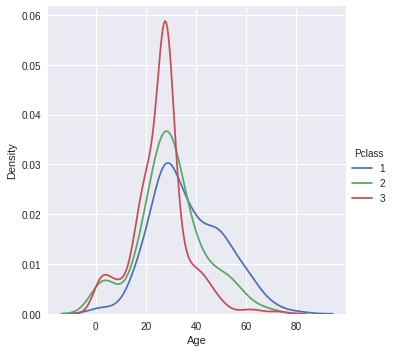

In [ ]:
import seaborn as sns

facet = sns.FacetGrid(data = df, hue = "Pclass", legend_out=True, size = 5)
facet = facet.map(sns.kdeplot, "Age") # kdeplot - плотность распределения 
facet.add_legend();

**Обработаем признак 'Fare'**

1) Проверьте, если ли в Fare пропущенные значения

2) Если пропущенные значения есть, заполните их медианным значением Fare

In [ ]:
# нет

**Обработаем признак 'Pclass'**

Есть ли в Pclass пропущенные значения?

In [ ]:
df['Pclass'].value_counts()

3    487
1    214
2    183
Name: Pclass, dtype: int64

**Задание 8.** Нарисуйте гистограмму выживаемости в зависимости от Pclass.

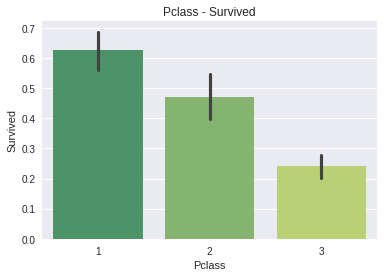

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=df, palette='summer') # стырили свыше
plt.title('Pclass - Survived')
plt.show()

**Обработаем признак 'SibSp' (число братьев или сестер, мужей, жен)**

Есть ли в SibSp пропущенные значения?

In [ ]:
df['SibSp'].value_counts()

0    603
1    207
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

**Обработаем признак 'Parch' (число родителей/детей)**

Есть ли в Parch пропущенные значения?

In [ ]:
df['Parch'].value_counts()

0    673
1    118
2     79
3      5
5      4
4      4
6      1
Name: Parch, dtype: int64

**Задание 9.** Столбец PassengerId является категориальным и не несёт важной информации, удалите его.

In [ ]:
df.head() # id просто бессмысленный (просто хардкодит ответы)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_number,Male,Female,Embarked_Q,Embarked_S
0,1,0,3,Braund; Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,Cumings; Mrs. John Bradley (Florence Briggs Th...,female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,Heikkinen; Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,1,0,1
3,4,1,1,Futrelle; Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,1,0,1,0,1
4,5,0,3,Allen; Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [ ]:
df = df.drop(columns=['PassengerId'])

# Исследование признаков и feature engineering

Нарисуем матрицу корреляций числовых признаков между собой и с целевой переменной. 

**Задание 10.** Создайте таблицу NumericData, которая содержит только числовые столбцы из таблицы Data.

In [ ]:
NumericData = df[['Age', 'Fare', 'SibSp', 'Parch']]

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

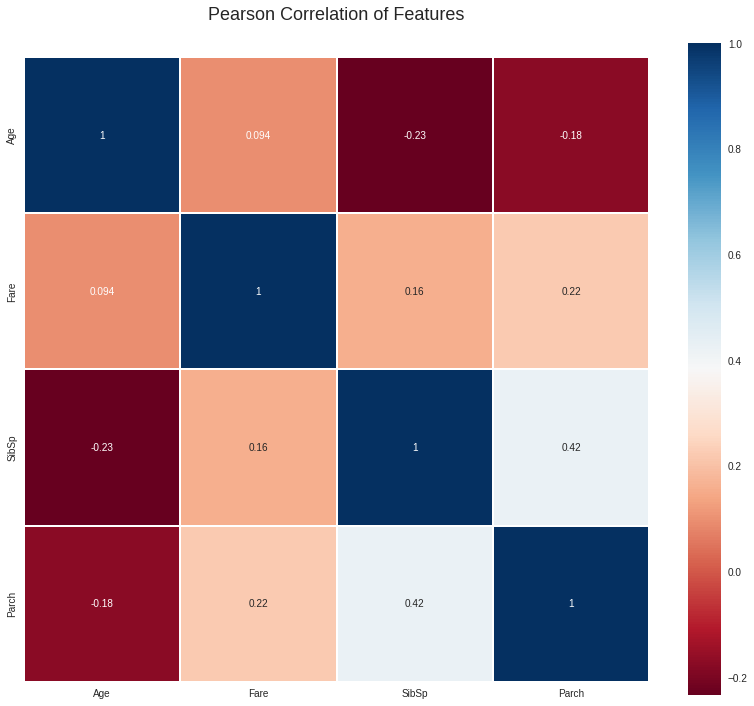

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))

plt.title('Pearson Correlation of Features', y=1.05, size=18)
sns.heatmap(NumericData.corr(),
            linewidths=0.1, vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Посмотрим на попарные зависимости некоторых признаков.

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


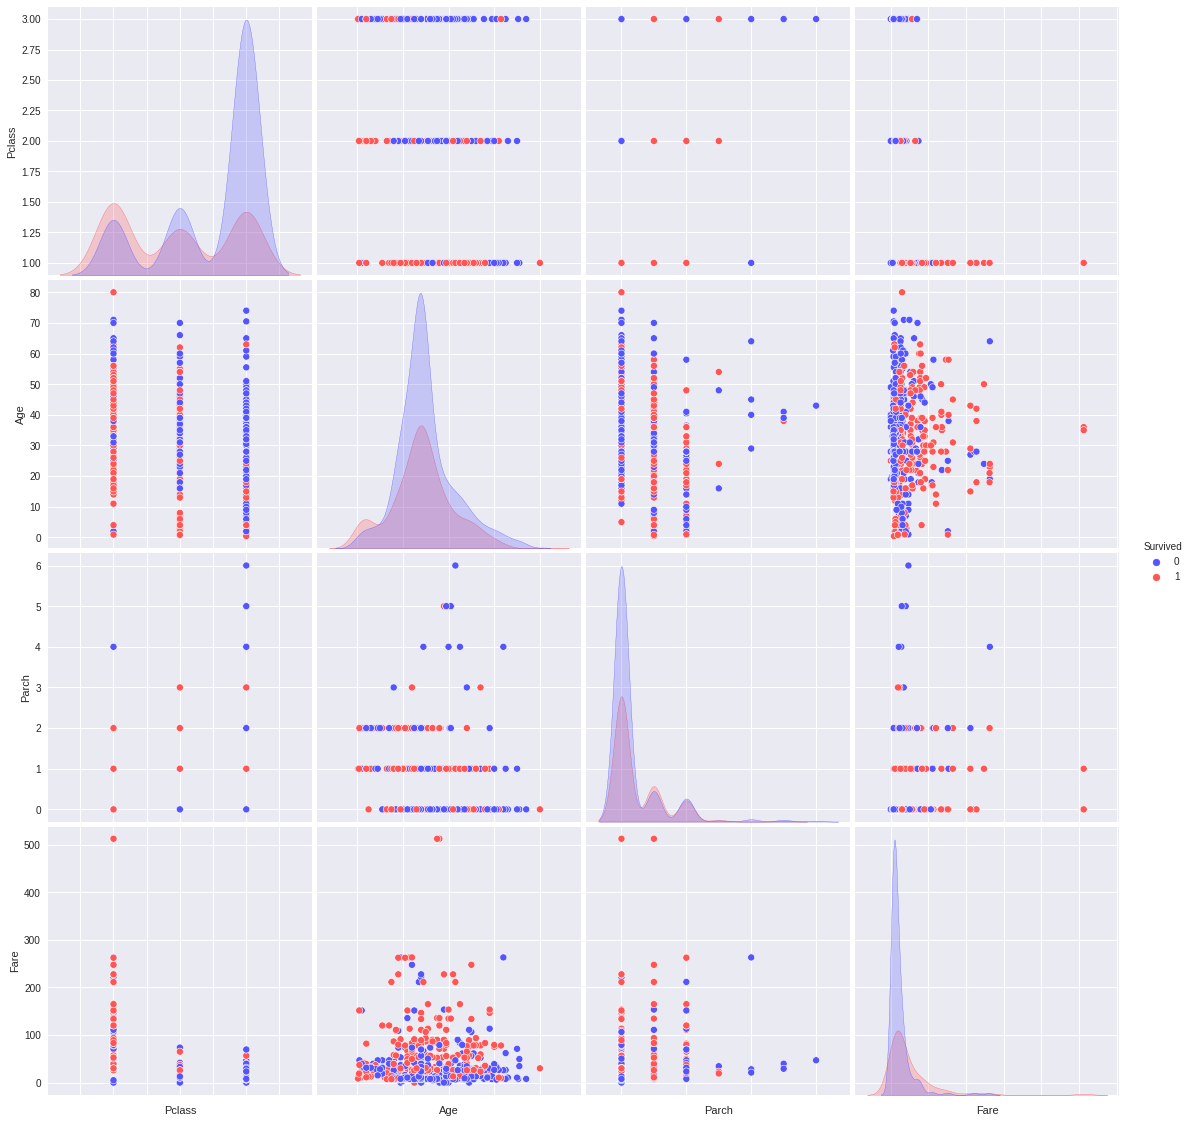

In [ ]:
g = sns.pairplot(df[[u'Survived', u'Pclass', u'Sex', u'Age', u'Parch', u'Fare']], \ # u = unicode
                 hue='Survived', palette = 'seismic', size=4, diag_kind = 'kde', \
                 diag_kws=dict(shade=True), plot_kws=dict(s=50) )
g.set(xticklabels=[])

Зачастую признак может быть зашумлен или может содержать лишнюю (слишком детализированную, ведущую к переобучению) информацию. Возможным решением этой проблемы служит бинаризация признака.

Бинаризуем признаки Age и Fare

* pd.cut - разбиение целочисленных данных на несколько интервалов по квантилям
* pd.qcut - разбиение числовых (не обязательно целочисленных) данных на несколько интервалов по квантилям

In [ ]:
df['AgeBin'] = pd.cut(df['Age'].astype(int), 5) # Все это, чтобы меньше было признаков

df['AgeBin'].head()

0    (16.0, 32.0]
1    (32.0, 48.0]
2    (16.0, 32.0]
3    (32.0, 48.0]
4    (32.0, 48.0]
Name: AgeBin, dtype: category
Categories (5, interval[float64, right]): [(-0.08, 16.0] < (16.0, 32.0] < (32.0, 48.0] <
                                           (48.0, 64.0] < (64.0, 80.0]]

Теперь переведём полученные интервалы в числа, используя LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder() # как id в списке уникальных (строка -> целое число)

df['AgeBin_Code'] = label.fit_transform(df['AgeBin']) # это тоже one-hot, просто присвоили всему чиселку 

df[['Age','AgeBin','AgeBin_Code']].head()

,Age,AgeBin,AgeBin_Code
0,22.0,"(16.0, 32.0]",1
1,38.0,"(32.0, 48.0]",2
2,26.0,"(16.0, 32.0]",1
3,35.0,"(32.0, 48.0]",2
4,35.0,"(32.0, 48.0]",2


**Задание 11.** Бинаризуйте Fare, используя разбиение на 4 интервала.

In [ ]:
df['FareBin'] = pd.qcut(df['Fare'].astype(int), 4) # Все это, чтобы меньше было признаков

df['FareBin'].head()

0    (-0.001, 7.0]
1    (31.0, 512.0]
2    (-0.001, 7.0]
3    (31.0, 512.0]
4      (7.0, 14.0]
Name: FareBin, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] <
                                           (31.0, 512.0]]

In [ ]:
df['FareBin'].unique()

[(-0.001, 7.0], (31.0, 512.0], (7.0, 14.0], (14.0, 31.0]]
Categories (4, interval[float64, right]): [(-0.001, 7.0] < (7.0, 14.0] < (14.0, 31.0] <
                                           (31.0, 512.0]]

In [ ]:
label = LabelEncoder()

df['FareBin_Code'] = label.fit_transform(df['FareBin']) 

Мы не используем всю информацию о данных, в частности, не используем текстовые данные. Также из матрицы корреляций мы видим, что признаки Parch и SibSp слабо коррелируют с выживаемостью (Survived). Сконструируем новые признаки, чтобы решить эти вопросы.

**Задание 12.**

1) Создайте признак 'NameLen' и запишите в него длину имени (Name).

2) Создайте признак 'FamilySize', равный Parch + SibSp + 1. Зачем добавлять 1?

3) Создайте признак 'IsAlone', который показывает, путешествовал человек один или с семьей.

In [ ]:
df['NameLen'] = df['Name'].apply(lambda x: len(x.strip())) # без пробелов

df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_number,Male,Female,Embarked_Q,Embarked_S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen
163,0,3,Calic; Mr. Jovo,male,17.0,0,0,315093,8.6625,NaN,0,1,0,0,1,"(16.0, 32.0]",1,"(7.0, 14.0]",1,15
770,0,3,Lievens; Mr. Rene Aime,male,24.0,0,0,345781,9.5000,NaN,0,1,0,0,1,"(16.0, 32.0]",1,"(7.0, 14.0]",1,22
884,0,3,Sutehall; Mr. Henry Jr,male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,0,1,0,0,1,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,22
530,1,2,Quick; Miss. Phyllis May,female,2.0,1,1,26360,26.0000,NaN,1,0,1,0,1,"(-0.08, 16.0]",0,"(14.0, 31.0]",2,24
575,0,3,Patchett; Mr. George,male,19.0,0,0,358585,14.5000,NaN,0,1,0,0,1,"(16.0, 32.0]",1,"(7.0, 14.0]",1,20


In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # series = np.array + label, аналог цикла

df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Male,Female,Embarked_Q,Embarked_S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize
573,1,3,Kelly; Miss. Mary,female,28.0,0,0,14312,7.7500,NaN,...,0,1,1,0,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,17,1
713,0,3,Larsson; Mr. August Viktor,male,29.0,0,0,7545,9.4833,NaN,...,1,0,0,1,"(16.0, 32.0]",1,"(7.0, 14.0]",1,26,1
850,0,3,Andersson; Master. Sigvard Harald Elias,male,4.0,4,2,347082,31.2750,NaN,...,1,0,0,1,"(-0.08, 16.0]",0,"(14.0, 31.0]",2,39,7
839,1,1,Marechal; Mr. Pierre,male,28.0,0,0,11774,29.7000,C47,...,1,0,0,0,"(16.0, 32.0]",1,"(14.0, 31.0]",2,20,1
824,0,3,Panula; Master. Urho Abraham,male,2.0,4,1,3101295,39.6875,NaN,...,1,0,0,1,"(-0.08, 16.0]",0,"(31.0, 512.0]",3,28,6


In [ ]:
df['IsAlone'] = (df['FamilySize'] == 1).astype('int')

df.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Female,Embarked_Q,Embarked_S,AgeBin,AgeBin_Code,FareBin,FareBin_Code,NameLen,FamilySize,IsAlone
660,1,1,Frauenthal; Dr. Henry William,male,50.0,2,0,PC 17611,133.6500,NaN,...,0,0,1,"(48.0, 64.0]",3,"(31.0, 512.0]",3,29,3,0
635,1,2,Davis; Miss. Mary,female,28.0,0,0,237668,13.0000,NaN,...,1,0,1,"(16.0, 32.0]",1,"(7.0, 14.0]",1,17,1,1
136,1,1,Newsom; Miss. Helen Monypeny,female,19.0,0,2,11752,26.2833,D47,...,1,0,1,"(16.0, 32.0]",1,"(14.0, 31.0]",2,28,3,0
249,0,2,Carter; Rev. Ernest Courtenay,male,54.0,1,0,244252,26.0000,NaN,...,0,0,1,"(48.0, 64.0]",3,"(14.0, 31.0]",2,29,2,0
840,0,3,Alhomaki; Mr. Ilmari Rudolf,male,20.0,0,0,SOTON/O2 3101287,7.9250,NaN,...,0,0,1,"(16.0, 32.0]",1,"(-0.001, 7.0]",0,27,1,1


**Задание 13.** Посмотрите, как коррелируют новые признаки (не забудьте про бинаризованные признаки) со столбцом 'Survived'.

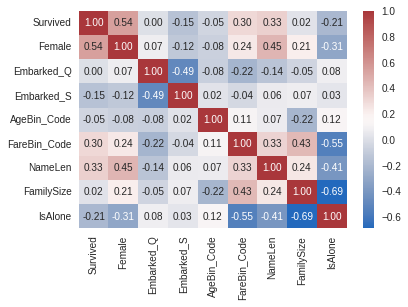

In [ ]:
df_for_corr = df.drop(columns=['Pclass', 'Age', 'Parch', 'SibSp', 'Fare', 'Male', 'Sex_number']) # то, что уже бинаризовали, выкинем
sns.heatmap(df_for_corr.corr(), cmap='vlag', annot=True, fmt='0.2f');

Можно извлечь и другую полезную информацию из данных путём конструирования новых признаков. 

**Задание 14*.** Придумайте ещё новые осмысленные признаки. Проверьте, как они коррелируют с выживаемостью.

In [ ]:
#your code here

**Задание 15.** Верно ли, что если признак имеет маленькую по модулю корреляцию с выживаемостью, то это означает, что он не влияет на выживаемость и бесполезен для нашей задачи?

**Кор. большая => x> & y>. По середине не отслеживает (если например во 2-м классе высокая выживаемость). Поэтому не верно (можно было получить полезную информацию, посмотрев на класс)**

# Бонус.

**Задание 16*.** Мы провели довольно подробный однофакторный анализ данных и увидели, какие признаки сильно влияют на выживаемость, а какие нет. 

a) Попробуйте написать свою модель для предсказания выживаемости, используя обнаруженные закономерности. 

b) Оцените качество модели - вычислите долю правильных ответов алгоритма по всем данным.

In [ ]:
def prediction(x):
    # x - один объект
    ...

In [ ]:
from sklearn.metrics import accuracy_score

pred = df.apply(lambda x: prediction(x), axis=1)

accuracy_score(df['Survived'], pred)

ValueError: ignored

**Задание 17.***

Разобъем данные на тренировочную и тестовую часть с помощью train_test_split.

2) Обучите KNN на тренировочной части, сделайте предсказание на тесте и вычислите долю правильных ответов.

3) С помощью написанной вами раннее модели сделайте предсказание на тесте и оцените его качество.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

y = df['Survived']
X = df._get_numeric_data().drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
#your code here